In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\KIIT0001\Downloads\deliveries.csv")

In [4]:
print("Initial Data:")
print(data.head())

Initial Data:
   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_ki

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


In [6]:
data.fillna({
    'batter': 'Unknown',
    'bowler': 'Unknown',
    'non_striker': 'Unknown',
    'extras_type': 'None',
    'player_dismisal': 'None',
    'dismissal_kind': 'Not Applicable',
    'fielder': 'None'
}, inplace=True)

In [7]:
data['match_id'] = data['match_id'].astype(str)
data['inning'] = data['inning'].astype(int)
data['over'] = data['over'].astype(float)
data['ball'] = data['ball'].astype(int)
data['batsman_runs'] = data['batsman_runs'].astype(int)
data['extra_runs'] = data['extra_runs'].astype(int)
data['total_runs'] = data['total_runs'].astype(int)


In [8]:
data['is_wicket'] = data['is_wicket'].astype(int)

In [9]:
print("\nCleaned Data:")
print(data.head())



Cleaned Data:
  match_id  inning           batting_team                 bowling_team  over  \
0   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
1   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
2   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
3   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
4   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed  dismissal_kind f

In [10]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type              0
is_wicket                0
player_dismissed    247970
dismissal_kind           0
fielder                  0
dtype: int64


In [11]:
data['player_dismissed'].fillna('Not Applicable', inplace=True)

In [12]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [13]:
print("Initial Data:")
print(data.head())

Initial Data:
  match_id  inning           batting_team                 bowling_team  over  \
0   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
1   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
2   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
3   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
4   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed  dismissal_kind fi

In [14]:
numerical_columns = ['over', 'ball']

In [15]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [16]:
cleaned_data = remove_outliers_iqr(data, numerical_columns)

In [17]:
print("\nCleaned Data (Outliers Removed):")
print(cleaned_data.describe())


Cleaned Data (Outliers Removed):
              inning           over           ball   batsman_runs  \
count  260888.000000  260888.000000  260888.000000  260888.000000   
mean        1.483522       9.197449       3.623697       1.264968   
std         0.502643       5.683311       1.813629       1.639241   
min         1.000000       0.000000       1.000000       0.000000   
25%         1.000000       4.000000       2.000000       0.000000   
50%         1.000000       9.000000       4.000000       1.000000   
75%         2.000000      14.000000       5.000000       1.000000   
max         6.000000      19.000000       9.000000       6.000000   

          extra_runs     total_runs      is_wicket  
count  260888.000000  260888.000000  260888.000000  
mean        0.067799       1.332767       0.049638  
std         0.343199       1.626352       0.217197  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000      

In [18]:
preprocessed_file_path = 'preprocessed_ipl_dataset.csv'
data.to_csv(preprocessed_file_path, index=False)
print(f"\nPreprocessed data saved to {preprocessed_file_path}")


Preprocessed data saved to preprocessed_ipl_dataset.csv


In [19]:
data2 = pd.read_csv(r"C:\Users\KIIT0001\Downloads\matches.csv")

In [20]:
print("Initial Data:")
print(data.head())

Initial Data:
  match_id  inning           batting_team                 bowling_team  over  \
0   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
1   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
2   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
3   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
4   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed  dismissal_kind fi

In [21]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [22]:
data.fillna({
    'player_of_match': 'Not Applicable',
    'toss_winner': 'Unknown',
    'toss_decision': 'Unknown',
    'winner': 'Not Applicable',
    'result': 'Not Applicable',
    'result_margin': 'Not Applicable',
    'target_runs': 0,
    'target_overs': 0,
    'super_over': 'No',
    'method': 'None',
    'umpire1': 'Unknown',
    'umpire2': 'Unknown'
}, inplace=True)


In [23]:
print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [24]:
#data['city'].fillna('Not Applicable', inplace=True)

In [25]:
print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [26]:
print("Initial Data:")
print(data.head())

Initial Data:
  match_id  inning           batting_team                 bowling_team  over  \
0   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
1   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
2   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
3   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   
4   335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   0.0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed  dismissal_kind fi

In [27]:
numerical_columns = ['result_margin', 'target_runs']

In [28]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [29]:
cleaned_data2 = remove_outliers_iqr(data2, numerical_columns)

In [30]:
print("\nCleaned Data (Outliers Removed):")
print(cleaned_data.describe())


Cleaned Data (Outliers Removed):
              inning           over           ball   batsman_runs  \
count  260888.000000  260888.000000  260888.000000  260888.000000   
mean        1.483522       9.197449       3.623697       1.264968   
std         0.502643       5.683311       1.813629       1.639241   
min         1.000000       0.000000       1.000000       0.000000   
25%         1.000000       4.000000       2.000000       0.000000   
50%         1.000000       9.000000       4.000000       1.000000   
75%         2.000000      14.000000       5.000000       1.000000   
max         6.000000      19.000000       9.000000       6.000000   

          extra_runs     total_runs      is_wicket  
count  260888.000000  260888.000000  260888.000000  
mean        0.067799       1.332767       0.049638  
std         0.343199       1.626352       0.217197  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000      

In [31]:
cleaned_file_path = 'cleaned_matches_no_outliers.csv'
cleaned_data2.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Cleaned data saved to cleaned_matches_no_outliers.csv


In [32]:
cleaned_data2.head(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,21-04-2008,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,22-04-2008,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,N,NaN,IL Howell,AM Saheba
7,335989,2007/08,Chennai,23-04-2008,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,2007/08,Hyderabad,24-04-2008,League,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,215.0,20.0,N,NaN,Asad Rauf,MR Benson
10,335992,2007/08,Bangalore,26-04-2008,League,SR Watson,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,136.0,20.0,N,NaN,MR Benson,IL Howell
11,335993,2007/08,Chennai,26-04-2008,League,JDP Oram,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,bat,Chennai Super Kings,wickets,9.0,148.0,20.0,N,NaN,BF Bowden,AV Jayaprakash
12,335994,2007/08,Mumbai,27-04-2008,League,AC Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,10.0,155.0,20.0,N,NaN,Asad Rauf,SL Shastri


In [33]:
cleaned_data2.isnull().sum()

id                   0
season               0
city                38
date                 0
match_type           0
player_of_match      0
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin        0
target_runs          0
target_overs         0
super_over           0
method             919
umpire1              0
umpire2              0
dtype: int64

In [34]:
cleaned_data2['team1'].value_counts()

team1
Chennai Super Kings            111
Royal Challengers Bangalore    109
Mumbai Indians                 104
Kolkata Knight Riders           97
Rajasthan Royals                87
Kings XI Punjab                 78
Delhi Daredevils                74
Sunrisers Hyderabad             72
Deccan Chargers                 37
Delhi Capitals                  34
Punjab Kings                    29
Pune Warriors                   22
Lucknow Super Giants            19
Gujarat Titans                  17
Gujarat Lions                   15
Royal Challengers Bengaluru      7
Rising Pune Supergiants          6
Kochi Tuskers Kerala             6
Rising Pune Supergiant           4
Name: count, dtype: int64

In [35]:
cleaned_data2['winner'].value_counts()

winner
Mumbai Indians                 122
Chennai Super Kings            112
Kolkata Knight Riders          109
Royal Challengers Bangalore     98
Rajasthan Royals                95
Kings XI Punjab                 76
Sunrisers Hyderabad             75
Delhi Daredevils                62
Delhi Capitals                  40
Deccan Chargers                 26
Gujarat Titans                  24
Lucknow Super Giants            21
Punjab Kings                    21
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant           8
Kochi Tuskers Kerala             6
Royal Challengers Bengaluru      5
Rising Pune Supergiants          3
Name: count, dtype: int64

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
matches_played = pd.concat([cleaned_data2['team1'], cleaned_data2['team2']]).value_counts()
matches_won = (cleaned_data2['winner'].value_counts())
win_percentage = (matches_won / matches_played)* 100

In [37]:
print(win_percentage)

Chennai Super Kings            54.901961
Deccan Chargers                38.235294
Delhi Capitals                 55.555556
Delhi Daredevils               44.927536
Gujarat Lions                  46.428571
Gujarat Titans                 60.000000
Kings XI Punjab                47.204969
Kochi Tuskers Kerala           46.153846
Kolkata Knight Riders          51.658768
Lucknow Super Giants           58.333333
Mumbai Indians                 54.464286
Pune Warriors                  28.571429
Punjab Kings                   41.176471
Rajasthan Royals               51.351351
Rising Pune Supergiant         61.538462
Rising Pune Supergiants        27.272727
Royal Challengers Bangalore    50.000000
Royal Challengers Bengaluru    41.666667
Sunrisers Hyderabad            49.668874
Name: count, dtype: float64


## Build the graph

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_27364\3803137971.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = win_percentage.index, y = win_percentage.values, palette='coolwarm')


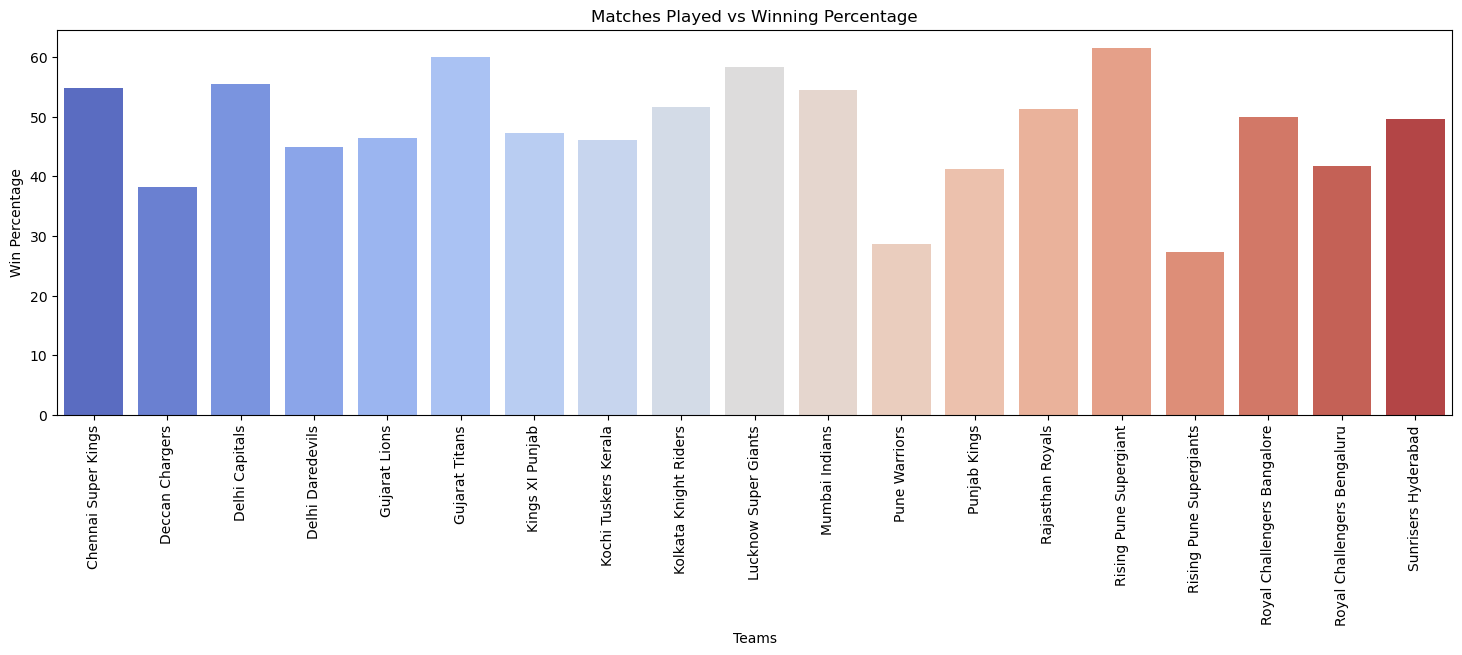

In [39]:
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

plt.figure(figsize=(18,5))
sns.barplot(x = win_percentage.index, y = win_percentage.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Win Percentage")
plt.title("Matches Played vs Winning Percentage")
plt.show()

In [40]:
cleaned_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Applicable,Not Applicable,None
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,Not Applicable,Not Applicable,None
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,Not Applicable,Not Applicable,None
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,Not Applicable,Not Applicable,None
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,None,0,Not Applicable,Not Applicable,None


In [41]:
team_total_runs = cleaned_data.groupby('batting_team')['total_runs'].sum()
team_total_balls = cleaned_data.groupby('batting_team')['over'].count()*6
team_run_rate = team_total_runs/team_total_balls * 100

In [42]:
print(team_run_rate)

batting_team
Chennai Super Kings            22.471812
Deccan Chargers                21.142847
Delhi Capitals                 22.687131
Delhi Daredevils               21.555059
Gujarat Lions                  22.723874
Gujarat Titans                 23.532447
Kings XI Punjab                22.126056
Kochi Tuskers Kerala           20.027391
Kolkata Knight Riders          22.208480
Lucknow Super Giants           23.170280
Mumbai Indians                 22.361513
Pune Warriors                  19.468430
Punjab Kings                   23.253771
Rajasthan Royals               22.067660
Rising Pune Supergiant         21.666667
Rising Pune Supergiants        21.761603
Royal Challengers Bangalore    22.271470
Royal Challengers Bengaluru    26.866630
Sunrisers Hyderabad            22.181782
dtype: float64


In [43]:
total_runs_conceded = cleaned_data.groupby('bowling_team')['total_runs'].sum()
total_overs_bowled = cleaned_data.groupby('bowling_team')['over'].count()*6
team_economy_rate = total_runs_conceded/total_overs_bowled * 100

In [44]:
print(team_economy_rate)

bowling_team
Chennai Super Kings            21.699511
Deccan Chargers                21.422512
Delhi Capitals                 22.877653
Delhi Daredevils               22.011856
Gujarat Lions                  23.937171
Gujarat Titans                 23.501855
Kings XI Punjab                22.581028
Kochi Tuskers Kerala           20.508055
Kolkata Knight Riders          21.961141
Lucknow Super Giants           23.637698
Mumbai Indians                 21.842164
Pune Warriors                  20.942520
Punjab Kings                   23.676638
Rajasthan Royals               22.157894
Rising Pune Supergiant         21.058091
Rising Pune Supergiants        21.805986
Royal Challengers Bangalore    22.321953
Royal Challengers Bengaluru    26.096613
Sunrisers Hyderabad            22.336081
dtype: float64


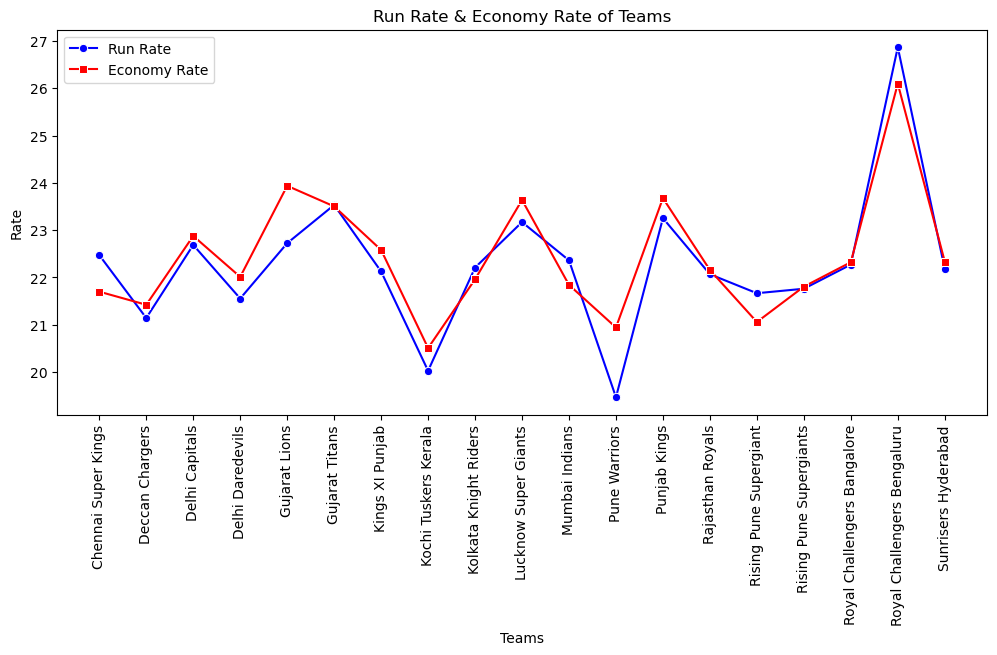

In [45]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=team_run_rate.index, y=team_run_rate.values, marker="o", label="Run Rate", color="blue")
sns.lineplot(x=team_economy_rate.index, y=team_economy_rate.values, marker="s", label="Economy Rate", color="red")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Rate")
plt.title("Run Rate & Economy Rate of Teams")
plt.legend()
plt.show()

In [46]:
team_scores = cleaned_data.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
highest_scores = team_scores.groupby('batting_team')['total_runs'].max().sort_values(ascending=False)
lowest_scores = team_scores.groupby('batting_team')['total_runs'].min().sort_values(ascending=True)

In [47]:
print (highest_scores), print(lowest_scores)

batting_team
Sunrisers Hyderabad            287
Kolkata Knight Riders          272
Royal Challengers Bangalore    263
Punjab Kings                   262
Royal Challengers Bengaluru    261
Lucknow Super Giants           257
Delhi Capitals                 257
Mumbai Indians                 247
Chennai Super Kings            246
Gujarat Titans                 233
Kings XI Punjab                232
Delhi Daredevils               231
Rajasthan Royals               226
Deccan Chargers                214
Gujarat Lions                  208
Rising Pune Supergiants        195
Pune Warriors                  192
Rising Pune Supergiant         187
Kochi Tuskers Kerala           184
Name: total_runs, dtype: int32
batting_team
Royal Challengers Bangalore      2
Rajasthan Royals                41
Sunrisers Hyderabad             44
Kolkata Knight Riders           48
Chennai Super Kings             55
Delhi Daredevils                56
Kings XI Punjab                 68
Mumbai Indians                  6

(None, None)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_27364\1155353321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_scores.index, y=highest_scores.values, palette="Blues_r")


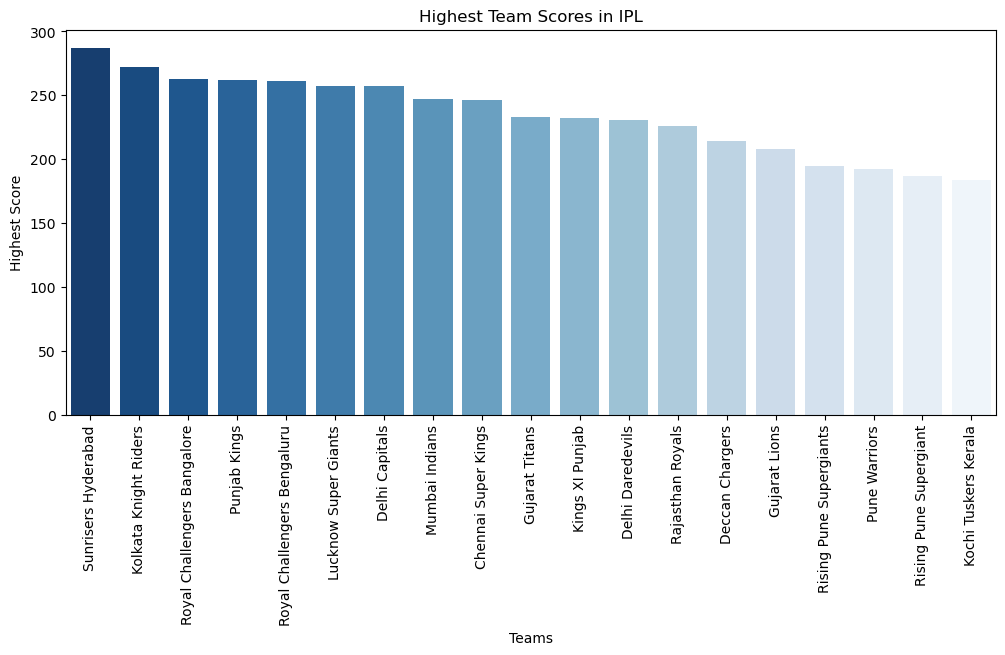

In [48]:
plt.figure(figsize=(12, 5))
sns.barplot(x=highest_scores.index, y=highest_scores.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Highest Score")
plt.title("Highest Team Scores in IPL")
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_27364\2516325487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lowest_scores.index, y=lowest_scores.values, palette="Reds_r")


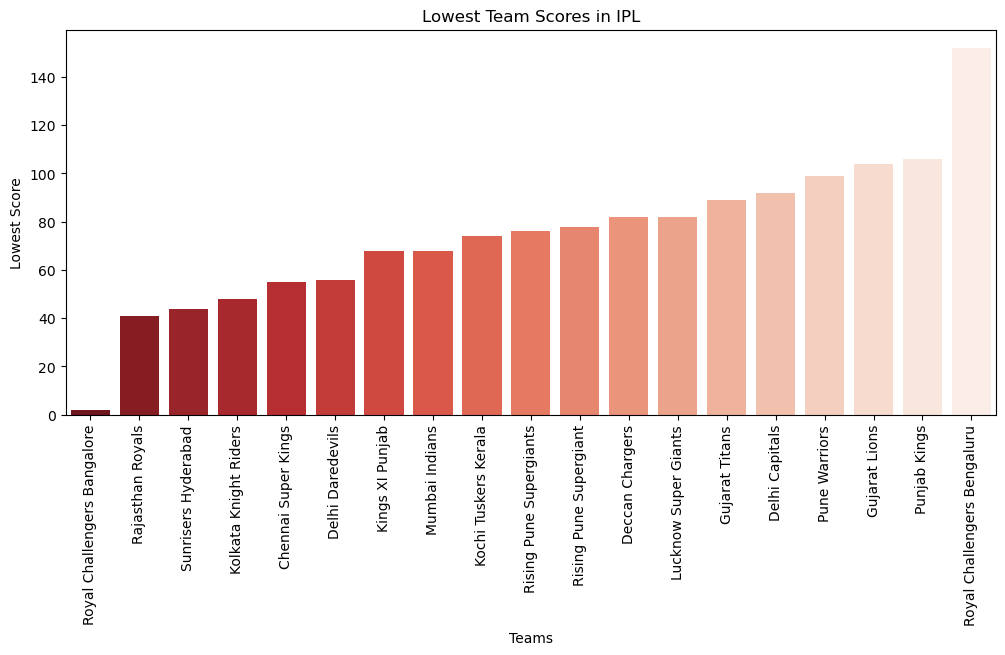

In [49]:
plt.figure(figsize=(12, 5))
sns.barplot(x=lowest_scores.index, y=lowest_scores.values, palette="Reds_r")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Lowest Score")
plt.title("Lowest Team Scores in IPL")
plt.show()

In [50]:
cleaned_data['batsman_runs'].head(50)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     4
9     4
10    6
11    4
12    0
13    0
14    0
15    0
16    4
17    1
18    0
19    0
20    6
21    0
22    4
23    0
24    1
25    6
26    4
27    1
28    4
29    0
30    1
31    0
32    1
33    0
34    0
35    0
36    0
37    0
38    1
39    1
40    1
41    2
42    1
43    1
44    0
45    1
46    1
47    1
48    1
49    1
Name: batsman_runs, dtype: int32

In [51]:
fours = cleaned_data[cleaned_data['batsman_runs'] == 4].groupby('batting_team').size()
sixes = cleaned_data[cleaned_data['batsman_runs'] == 6].groupby('batting_team').size()
fours_sixes = pd.DataFrame({'Fours': fours, 'Sixes': sixes}).fillna(0)
print(fours_sixes)

                             Fours  Sixes
batting_team                             
Chennai Super Kings           3196   1509
Deccan Chargers                956    400
Delhi Capitals                1352    550
Delhi Daredevils              2156    801
Gujarat Lions                  460    155
Gujarat Titans                 690    271
Kings XI Punjab               2631   1075
Kochi Tuskers Kerala           170     53
Kolkata Knight Riders         3461   1494
Lucknow Super Giants           577    331
Mumbai Indians                3636   1685
Pune Warriors                  525    196
Punjab Kings                   795    439
Rajasthan Royals              3091   1237
Rising Pune Supergiant         197     89
Rising Pune Supergiants        171     68
Royal Challengers Bangalore   3149   1487
Royal Challengers Bengaluru    229    165
Sunrisers Hyderabad           2405   1042


<Figure size 1200x500 with 0 Axes>

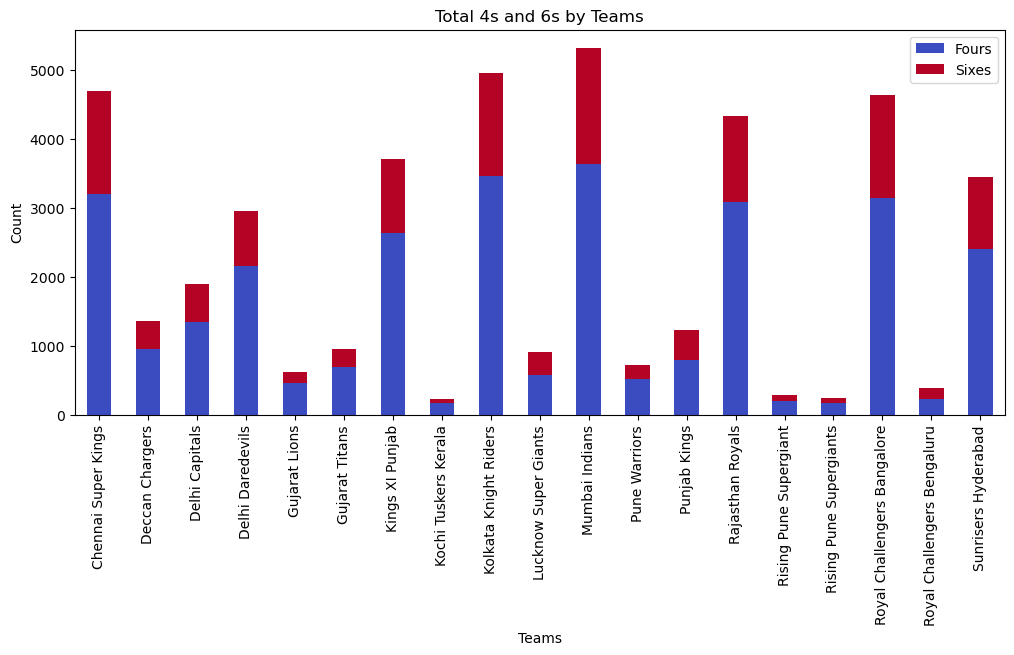

In [52]:
plt.figure(figsize=(12, 5))
fours_sixes.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 5))
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Count")
plt.title("Total 4s and 6s by Teams")
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_27364\4146088730.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=powerplay_scores.index, y=powerplay_scores.values, palette="viridis", label="Powerplay")
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_27364\4146088730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=death_overs_scores.index, y=death_overs_scores.values, palette="magma", alpha=0.7, label="Death Overs")


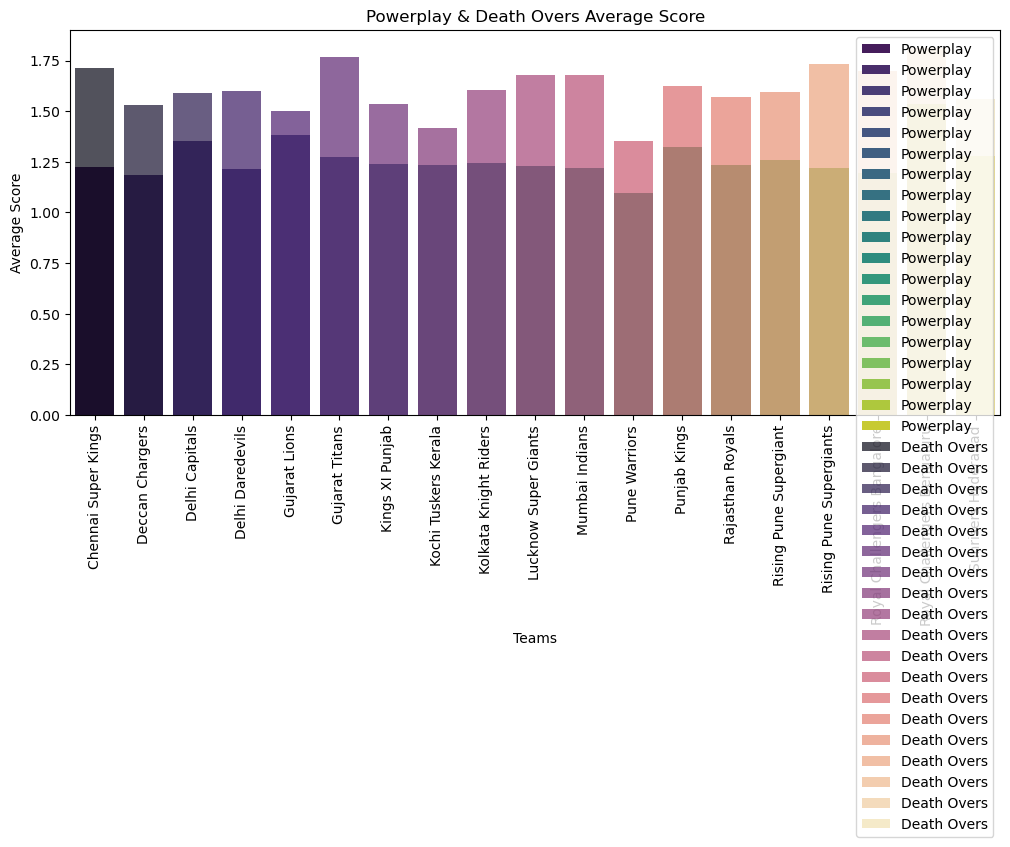

In [53]:
powerplay_scores = cleaned_data[cleaned_data['over'] <= 6].groupby('batting_team')['total_runs'].mean()
death_overs_scores = cleaned_data[cleaned_data['over'] >= 16].groupby('batting_team')['total_runs'].mean()

plt.figure(figsize=(12, 5))
sns.barplot(x=powerplay_scores.index, y=powerplay_scores.values, palette="viridis", label="Powerplay")
sns.barplot(x=death_overs_scores.index, y=death_overs_scores.values, palette="magma", alpha=0.7, label="Death Overs")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Average Score")
plt.title("Powerplay & Death Overs Average Score")
plt.legend()
plt.show()

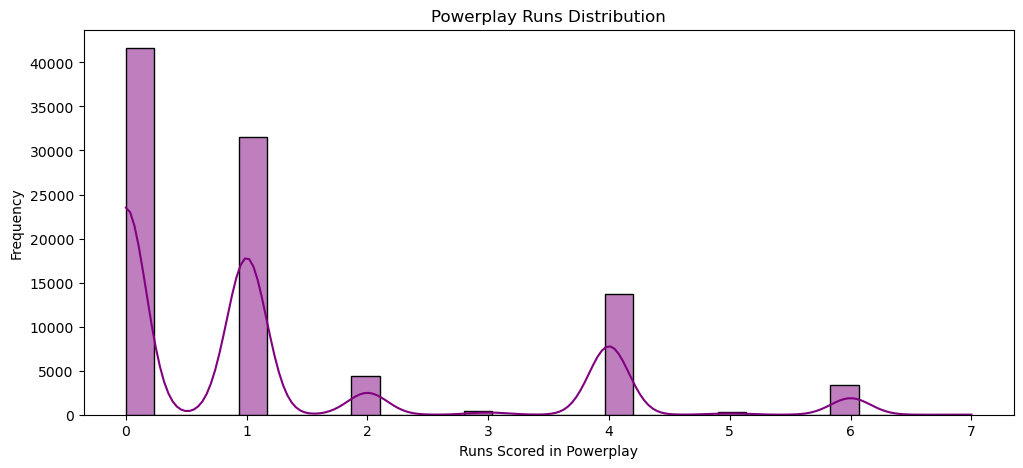

In [54]:
plt.figure(figsize=(12, 5))
sns.histplot(cleaned_data[cleaned_data['over'] <= 6]['total_runs'], bins=30, kde=True, color="purple")
plt.xlabel("Runs Scored in Powerplay")
plt.ylabel("Frequency")
plt.title("Powerplay Runs Distribution")
plt.show()

## Player Perfomance

In [56]:
top_scorers = cleaned_data.groupby('batter')['batsman_runs'].sum().nlargest(20)

In [57]:
print(top_scorers)

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4953
KD Karthik        4842
KL Rahul          4689
AM Rahane         4642
F du Plessis      4571
SV Samson         4418
AT Rayudu         4348
G Gambhir         4217
SR Watson         3880
MK Pandey         3859
SA Yadav          3594
JC Buttler        3583
Name: batsman_runs, dtype: int32


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_27364\2522782004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.index, y=top_scorers.values, palette="viridis")


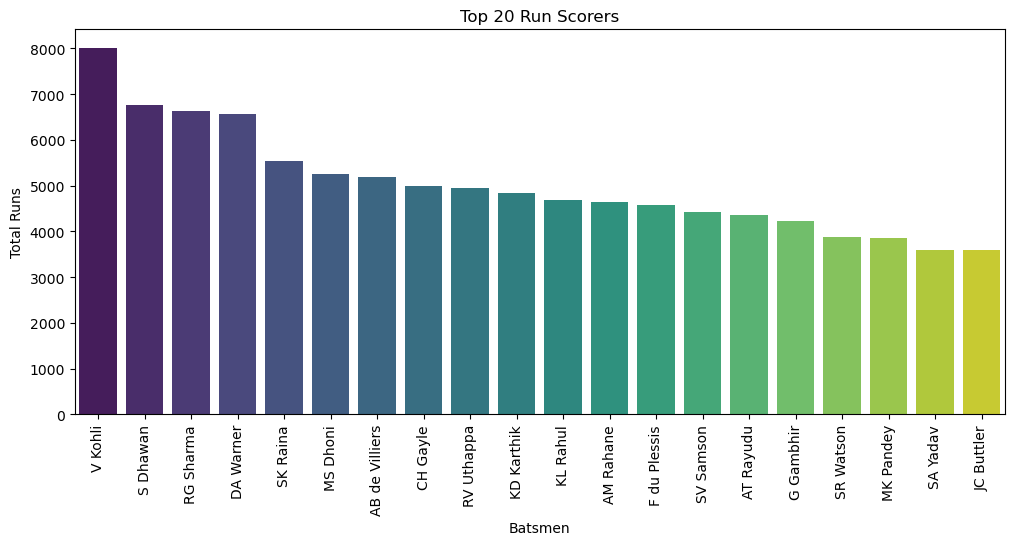

In [58]:
plt.figure(figsize=(12, 5))
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Batsmen")
plt.ylabel("Total Runs")
plt.title("Top 20 Run Scorers")
plt.show()

In [59]:
# Group by batsman and calculate total runs and total balls faced
batsman_stats = cleaned_data.groupby('batter').agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count')
)

# Calculate batting average (Total Runs / Number of dismissals)
batsman_stats['batting_avg'] = batsman_stats['runs'] / cleaned_data.groupby('batter')['player_dismissed'].count()

# Calculate strike rate (Runs per 100 balls)
batsman_stats['strike_rate'] = (batsman_stats['runs'] / batsman_stats['balls']) * 100


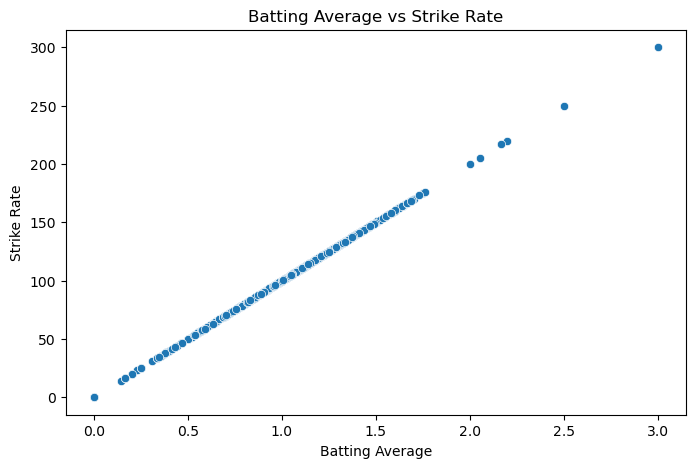

In [60]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=batsman_stats, x='batting_avg', y='strike_rate')
plt.xlabel("Batting Average")
plt.ylabel("Strike Rate")
plt.title("Batting Average vs Strike Rate")
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_27364\2451118298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette="magma")


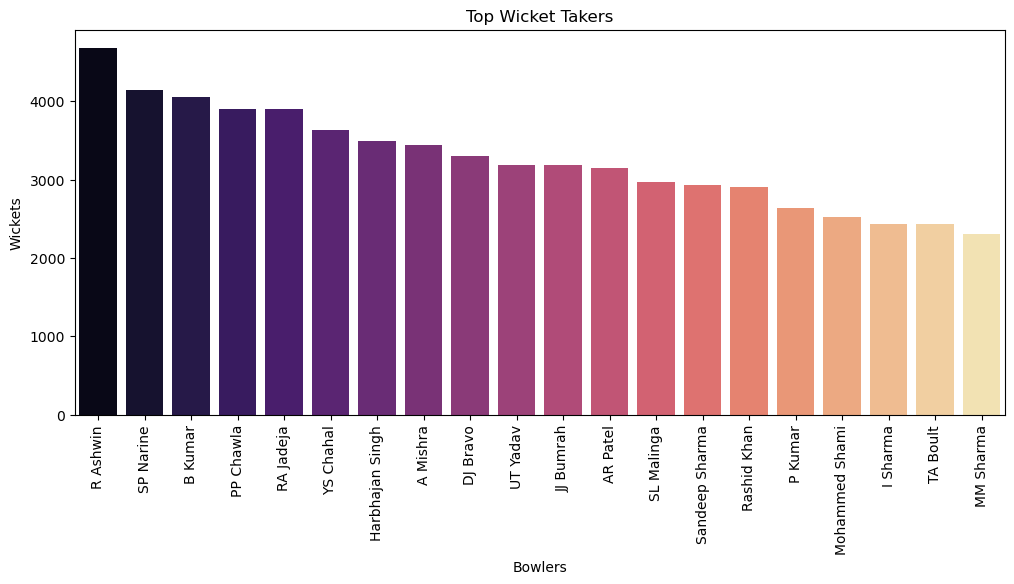

In [61]:
# Top Wicket-Takers
top_wicket_takers = cleaned_data[cleaned_data['dismissal_kind'].notna()].groupby('bowler').size().nlargest(20)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Bowlers")
plt.ylabel("Wickets")
plt.title("Top Wicket Takers")
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_27364\2122376441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mom_counts.index, y=mom_counts.values, palette="coolwarm")


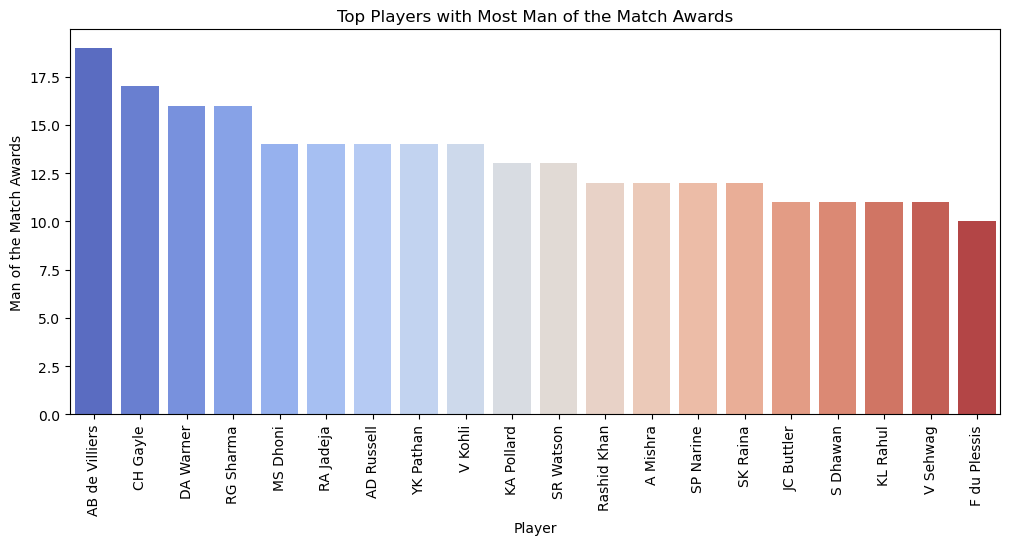

In [62]:
# Man of the Match Count
mom_counts = cleaned_data2['player_of_match'].value_counts().nlargest(20)
plt.figure(figsize=(12, 5))
sns.barplot(x=mom_counts.index, y=mom_counts.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Player")
plt.ylabel("Man of the Match Awards")
plt.title("Top Players with Most Man of the Match Awards")
plt.show()

C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


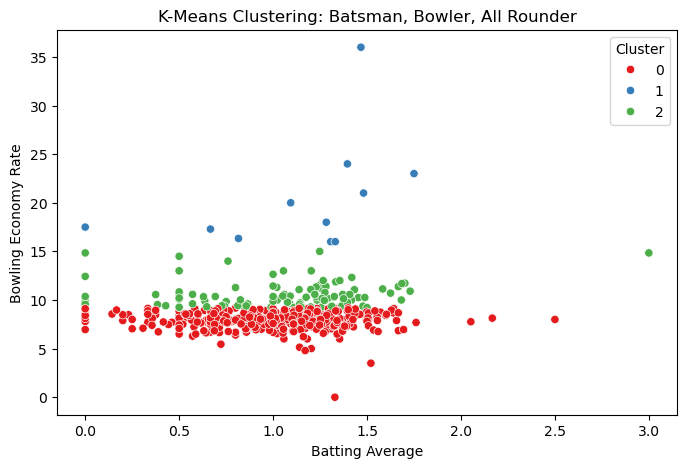

In [63]:
from sklearn.cluster import KMeans


batsmen_bowlers = batsman_stats.copy()
batsmen_bowlers['economy_rate'] = cleaned_data.groupby('bowler')['total_runs'].sum() / (cleaned_data.groupby('bowler')['ball'].count() / 6)
kmeans = KMeans(n_clusters=3, random_state=42)
batsmen_bowlers.dropna(inplace=True)
batsmen_bowlers['Cluster'] = kmeans.fit_predict(batsmen_bowlers[['batting_avg', 'economy_rate']])

plt.figure(figsize=(8, 5))
sns.scatterplot(data=batsmen_bowlers, x='batting_avg', y='economy_rate', hue='Cluster', palette='Set1')
plt.xlabel("Batting Average")
plt.ylabel("Bowling Economy Rate")
plt.title("K-Means Clustering: Batsman, Bowler, All Rounder")
plt.show()


## Seasonal Analysis

In [65]:
cleaned_data2_renamed = cleaned_data2[['id', 'season']].rename(columns={'id': 'match_id'})
deliveries_df = pd.concat([cleaned_data, cleaned_data2_renamed.set_index('match_id')], axis=1)
deliveries_df = deliveries_df.reset_index()
deliveries_df.head(10)

,index,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
0,0,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,Not Applicable,Not Applicable,None,NaN
1,1,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,None,0.0,Not Applicable,Not Applicable,None,NaN
2,2,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,Not Applicable,Not Applicable,None,NaN
3,3,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,None,0.0,Not Applicable,Not Applicable,None,NaN
4,4,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,None,0.0,Not Applicable,Not Applicable,None,NaN
5,5,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,6.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,None,0.0,Not Applicable,Not Applicable,None,NaN
6,6,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,7.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,legbyes,0.0,Not Applicable,Not Applicable,None,NaN
7,7,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,1.0,BB McCullum,Z Khan,SC Ganguly,0.0,0.0,0.0,None,0.0,Not Applicable,Not Applicable,None,NaN
8,8,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,2.0,BB McCullum,Z Khan,SC Ganguly,4.0,0.0,4.0,None,0.0,Not Applicable,Not Applicable,None,NaN
9,9,335982,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,3.0,BB McCullum,Z Khan,SC Ganguly,4.0,0.0,4.0,None,0.0,Not Applicable,Not Applicable,None,NaN


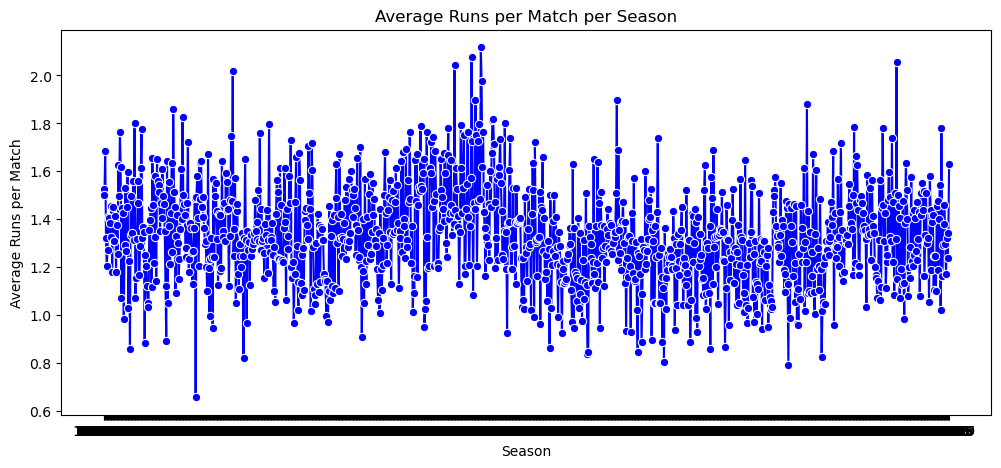

In [66]:
# 1️⃣ Average Runs per Match per Season
season_runs = deliveries_df.groupby('match_id')['total_runs'].sum()
season_matches = deliveries_df['match_id'].value_counts().sort_index()
avg_runs_per_match = season_runs / season_matches

plt.figure(figsize=(12, 5))
sns.lineplot(x=avg_runs_per_match.index, y=avg_runs_per_match.values, marker='o', color='b')
plt.xlabel("Season")
plt.ylabel("Average Runs per Match")
plt.title("Average Runs per Match per Season")
plt.show()

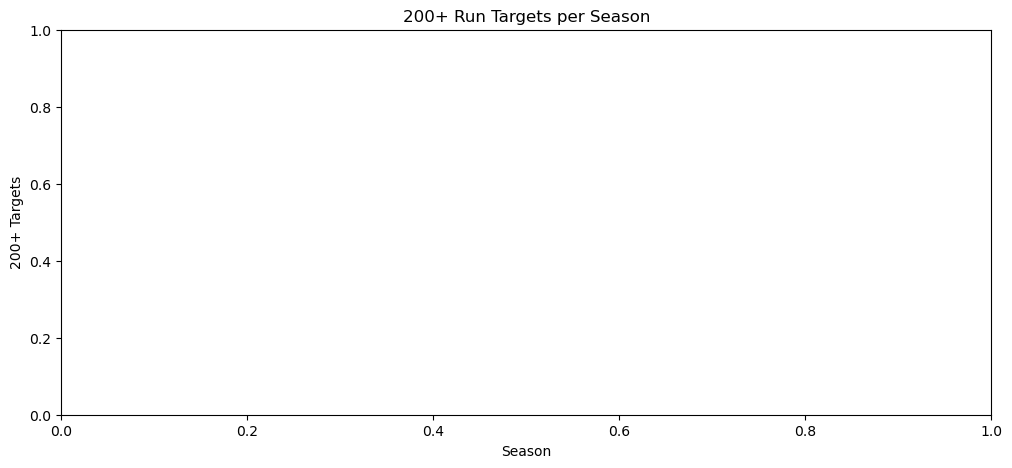

In [67]:
# 2️⃣ Targets of 200+ Runs per Season
high_scores = deliveries_df[deliveries_df['total_runs'] >= 200].groupby('match_id').size()

plt.figure(figsize=(12, 5))
sns.barplot(x=high_scores.index, y=high_scores.values, palette='Reds')
plt.xlabel("Season")
plt.ylabel("200+ Targets")
plt.title("200+ Run Targets per Season")
plt.show()

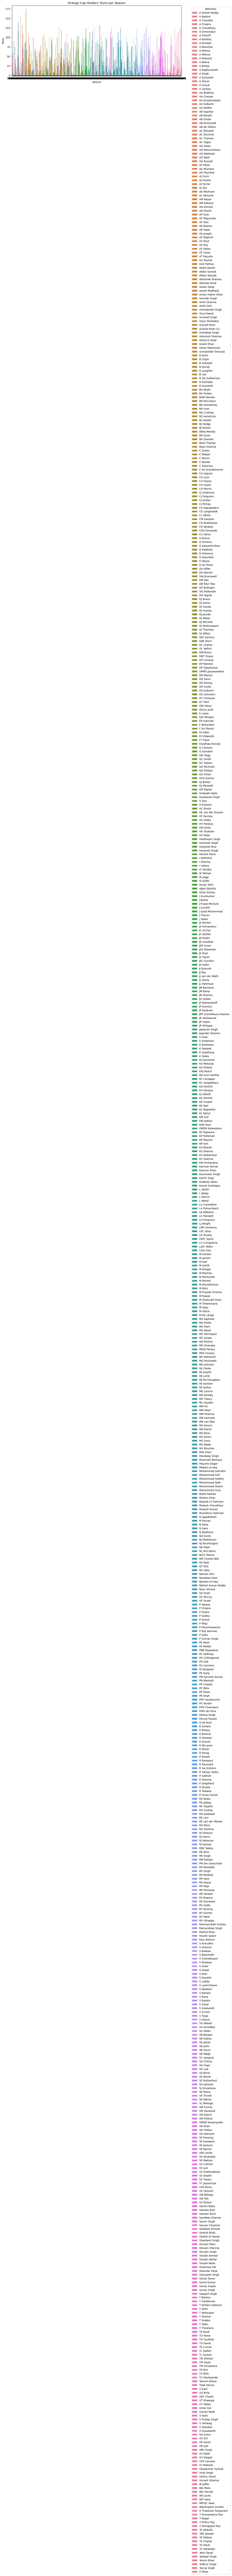

In [68]:
# 4️⃣ Runs of Orange Cap Holders per Season
orange_cap = deliveries_df.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
orange_cap = orange_cap.loc[orange_cap.groupby('batter')['batsman_runs'].idxmax()]

plt.figure(figsize=(12, 5))
sns.barplot(x=orange_cap['match_id'], y=orange_cap['batsman_runs'], hue=orange_cap['batter'], dodge=False)
plt.xlabel("Season")
plt.ylabel("Runs")
plt.title("Orange Cap Holders' Runs per Season")
plt.legend(title="Batsman", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

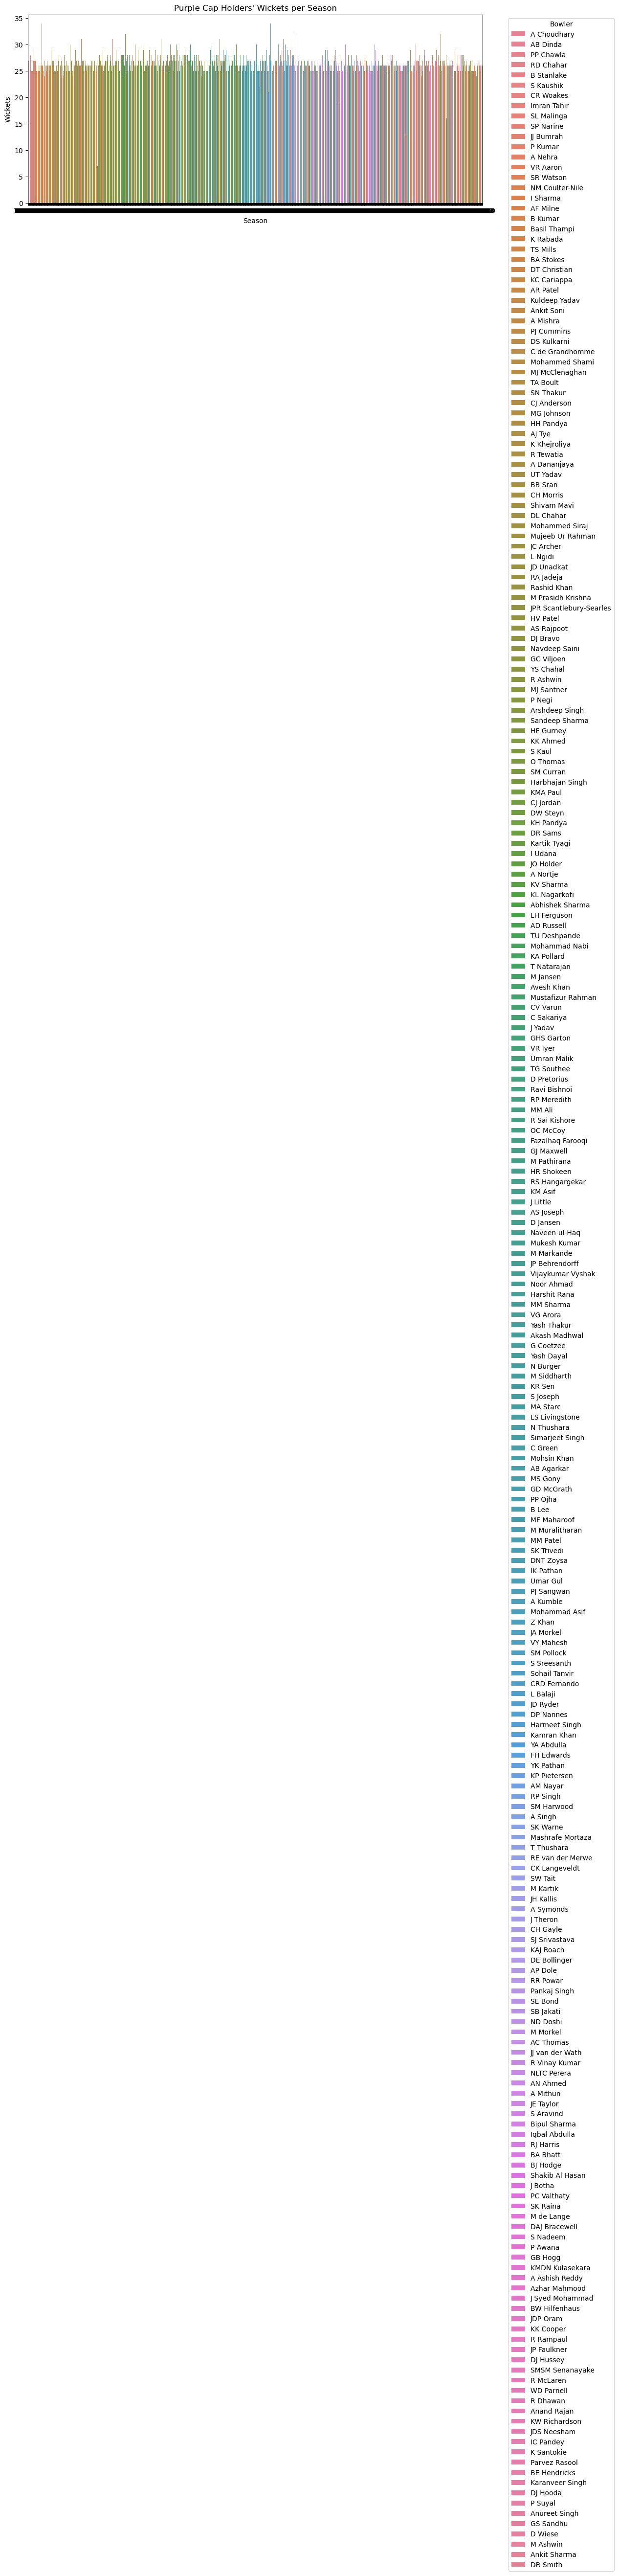

In [69]:
# 5️⃣ Wickets of Purple Cap Holders per Season
purple_cap = deliveries_df[deliveries_df['dismissal_kind'].notna()].groupby(['match_id', 'bowler']).size().reset_index(name='wickets')
purple_cap = purple_cap.loc[purple_cap.groupby('match_id')['wickets'].idxmax()]

plt.figure(figsize=(12, 5))
sns.barplot(x=purple_cap['match_id'], y=purple_cap['wickets'], hue=purple_cap['bowler'], dodge=False)
plt.xlabel("Season")
plt.ylabel("Wickets")
plt.title("Purple Cap Holders' Wickets per Season")
plt.legend(title="Bowler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

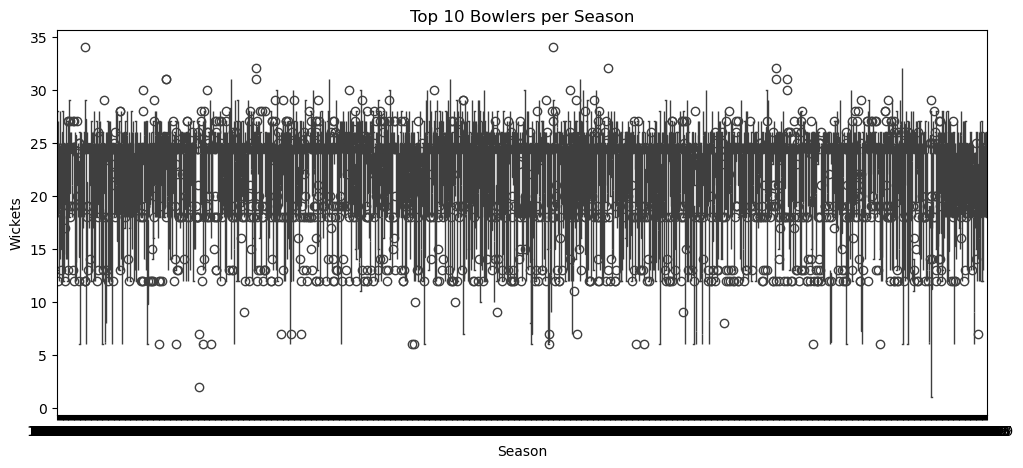

In [70]:
# 6️⃣ Top 10 Bowlers per Season
top_bowlers = deliveries_df[deliveries_df['dismissal_kind'].notna()].groupby(['match_id', 'bowler']).size().reset_index(name='wickets')
top_bowlers = top_bowlers.sort_values(['match_id', 'wickets'], ascending=[True, False]).groupby('match_id').head(10)

plt.figure(figsize=(12, 5))
sns.boxplot(data=top_bowlers, x='match_id', y='wickets')
plt.xlabel("Season")
plt.ylabel("Wickets")
plt.title("Top 10 Bowlers per Season")
plt.show()

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [72]:
matches_df = pd.read_csv(r"C:\Users\KIIT0001\Downloads\cleaned_matches_no_outliers.csv")
deliveries_df = pd.read_csv(r"C:\Users\KIIT0001\Downloads\Brain Dead IPL Dataset\deliveries.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\KIIT0001\\Downloads\\cleaned_matches_no_outliers.csv'

In [ ]:
encoder = LabelEncoder()
matches_df['team1'] = encoder.fit_transform(matches_df['team1'])
matches_df['team2'] = encoder.transform(matches_df['team2'])
matches_df['toss_winner'] = encoder.transform(matches_df['toss_winner'])
matches_df['winner'] = encoder.transform(matches_df['winner'])

In [ ]:
matches_df['head_to_head'] = matches_df.groupby(['team1', 'team2'])['winner'].transform(lambda x: x.eq(x.mode()[0]).sum())
matches_df['recent_win_percentage'] = matches_df.groupby('team1')['winner'].transform(lambda x: x.rolling(5).apply(lambda y: (y == x.mode()[0]).sum() / 5, raw=True))
matches_df['home_advantage'] = (matches_df['team1'] == matches_df['city']).astype(int)
matches_df['batting_first_win'] = matches_df['toss_decision'].map({'bat': 1, 'field': 0}) == (matches_df['winner'] == matches_df['team1'])

In [ ]:
# Select relevant features
# Convert 'season' column to integer format (extract first 4 characters)
matches_df['season'] = matches_df['season'].astype(str).str[:4].astype(int)
matches_df['venue'] = encoder.fit_transform(matches_df['venue'])
# Updated features list
features = ['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'head_to_head', 'recent_win_percentage', 'home_advantage', 'batting_first_win']
# features = ['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'head_to_head', 'recent_win_percentage', 'home_advantage', 'batting_first_win']
target = 'winner'
matches_df['toss_decision'] = matches_df['toss_decision'].map({'bat': 0, 'field': 1})

In [ ]:
# Fill missing values
matches_df.fillna(0, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(matches_df[features], matches_df[target], test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
%pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

In [ ]:
from scipy.stats import mode

from scipy.stats import mode

# Function to compute win percentage in the last 5 matches
def recent_win_percentage(series):
    if len(series) == 0:
        return 0
    most_common_winner = mode(series, keepdims=True)[0][0]  # Most frequent winner
    return (series == most_common_winner).sum() / len(series)

# Apply function to calculate recent win percentage for both teams
matches_df['team1_recent_wins'] = (
    matches_df.groupby('team1')['winner']
    .apply(lambda x: x.shift().rolling(5, min_periods=1).apply(recent_win_percentage, raw=True))
    .reset_index(level=0, drop=True)  # Reset index to align with matches_df
)

matches_df['team2_recent_wins'] = (
    matches_df.groupby('team2')['winner']
    .apply(lambda x: x.shift().rolling(5, min_periods=1).apply(recent_win_percentage, raw=True))
    .reset_index(level=0, drop=True)
)

# Add batting strength (average runs per match)
team_avg_runs = deliveries_df.groupby('batting_team')['total_runs'].mean().to_dict()
matches_df['team1_avg_runs'] = matches_df['team1'].map(team_avg_runs)
matches_df['team2_avg_runs'] = matches_df['team2'].map(team_avg_runs)

# Add bowling economy rate (runs conceded per over)
team_economy = deliveries_df.groupby('bowling_team').apply(lambda x: x['total_runs'].sum() / (x['ball'].count() / 6)).to_dict()
matches_df['team1_bowling_economy'] = matches_df['team1'].map(team_economy)
matches_df['team2_bowling_economy'] = matches_df['team2'].map(team_economy)

# Win Rate at Venue
venue_win_rate = matches_df.groupby(['venue', 'winner']).size().unstack(fill_value=0)
venue_win_rate = venue_win_rate.div(venue_win_rate.sum(axis=1), axis=0)  # Normalize

matches_df['team1_venue_win_rate'] = matches_df.apply(lambda row: venue_win_rate.loc[row['venue'], row['team1']] if row['venue'] in venue_win_rate.index and row['team1'] in venue_win_rate.columns else 0, axis=1)
matches_df['team2_venue_win_rate'] = matches_df.apply(lambda row: venue_win_rate.loc[row['venue'], row['team2']] if row['venue'] in venue_win_rate.index and row['team2'] in venue_win_rate.columns else 0, axis=1)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define model and parameter grid
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
}

grid_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
grid_search.fit(X_train, y_train)

# Best model
best_xgb_model = grid_search.best_estimator_


In [ ]:
# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Best XGBoost Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix to visualize performance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# Predictions on the Test Set
# --------------------------
# Use the best_xgb_model to predict outcomes on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate model performance
print("Best XGBoost Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot a confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# --------------------------
# Prediction for a New Match
# --------------------------

# Assuming you have the following mapping dictionaries from your encoders:
# For teams:
team_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
# For venues:
venue_mapping = dict(zip(venue_encoder.classes_, venue_encoder.transform(venue_encoder.classes_)))

def predict_match(team1, team2, toss_winner, toss_decision, venue):
    # Use mapping dictionaries to get numerical encodings
    team1_encoded = team_mapping.get(team1, -1)
    team2_encoded = team_mapping.get(team2, -1)
    toss_winner_encoded = team_mapping.get(toss_winner, -1)
    toss_decision_encoded = 0 if toss_decision.lower() == 'bat' else 1
    venue_encoded = venue_mapping.get(venue, -1)
    
    # Check for invalid encoding
    if -1 in [team1_encoded, team2_encoded, toss_winner_encoded, venue_encoded]:
        raise ValueError("One or more input values are invalid. Check the team and venue names.")
    
    # Construct the input vector with 10 features:
    # [season, team1, team2, toss_winner, toss_decision, venue, head_to_head, recent_win_percentage, home_advantage, batting_first_win]
    input_features = np.array([[2025, 
                                team1_encoded, 
                                team2_encoded, 
                                toss_winner_encoded, 
                                toss_decision_encoded, 
                                venue_encoded, 
                                0,    # head_to_head (set to 0 if unknown)
                                0,    # recent_win_percentage (set to 0 if unknown)
                                0,    # home_advantage (set to 0 if unknown)
                                0]]) # batting_first_win (set to 0 if unknown)
    
    # Debug print: verify that input_features has 10 columns
    print("Input features shape:", input_features.shape)  # Should print (1, 10)
    
    # Define the feature names (same order as used in training)
    features = ['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 
                'venue', 'head_to_head', 'recent_win_percentage', 'home_advantage', 'batting_first_win']
    
    # Create a DMatrix with feature names
    input_data = xgb.DMatrix(input_features, feature_names=features)
    
    # Get prediction probabilities from the booster
    prediction_proba = booster.predict(input_data)
    prediction = np.argmax(prediction_proba, axis=1)
    
    # Convert numeric prediction back to team name using the encoder
    predicted_team = encoder.inverse_transform(prediction)[0]
    return predicted_team

# Example match prediction:
predicted_winner = predict_match("Mumbai Indians", "Chennai Super Kings", "Mumbai Indians", "bat", "Wankhede Stadium")
print("🏆 Predicted Winner:", predicted_winner)

## LSTM

In [73]:
# Load IPL match dataset
# matches_df = pd.read_csv("/mnt/data/matches.csv")
from sklearn.preprocessing import MinMaxScaler

# Encode categorical variables (team names, venue, toss winner, toss decision)
encoder = LabelEncoder()
matches_df['team1'] = encoder.fit_transform(matches_df['team1'])
matches_df['team2'] = encoder.transform(matches_df['team2'])
matches_df['toss_winner'] = encoder.transform(matches_df['toss_winner'])
matches_df['winner'] = encoder.transform(matches_df['winner'])

# Encode venue separately
venue_encoder = LabelEncoder()
matches_df['venue'] = venue_encoder.fit_transform(matches_df['venue'])

# Convert 'season' to numerical format
matches_df['season'] = matches_df['season'].astype(str).str[:4].astype(int)

# Map toss decision (bat=0, field=1)
matches_df['toss_decision'] = matches_df['toss_decision'].map({'bat': 0, 'field': 1})

# Select features for training
features = ['season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue']
target = 'winner'

# Normalize numerical data (Scaling features between 0 and 1)
scaler = MinMaxScaler()
matches_df[features] = scaler.fit_transform(matches_df[features])

# Reshape data for LSTM (LSTMs expect a 3D input: [samples, time steps, features])
X = matches_df[features].values
y = matches_df[target].values

# Reshaping X for LSTM input (Adding time step dimension)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'matches_df' is not defined

In [ ]:
%pip install tensorflow

In [ ]:
# Define LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')  # Softmax for multi-class classification
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
